#Tic-Tac-Toe Agent
One of the most popular and enduring games of all time is Tic-Tac-Toe. Because of its familiarity, this game is often used as a starting example to mathematically analyze a decision-making process. Its brevity makes it a perfect game to illustrate the rewards of thinking ahead and learning the consequence of each decision.

 

There are many variants of Tic-Tac-Toe. The most classic one is of X’s and O’s, where each player aims to place three of their marks in a horizontal, vertical, or diagonal row in a 3x3 grid.

 

The other popular variant of this game is Numerical Tic-Tac-Toe. Instead of X’s and O’s, the numbers 1 to 9 are used. In the 3x3 grid, numbers 1 to 9 are filled, with one number in each cell. The first player plays with the odd numbers, the second player plays with the even numbers, i.e. player 1 can enter only an odd number in the cell while player 2 can enter an even number in one of the remaining cells. Each number can be used exactly once in the entire grid. The player who puts down 15 points in a line - (column, row or a diagonal) wins the game. 

 

It is recommended that you play the game here for more clarity.

 
**Rules of the Game:**

1.   The game will be played on a 3x3 grid (9 cells) using numbers from 1 to 9. Each number can be used exactly once in the entire grid.

2.   There are two players: one is the Reinforcement Learning (RL) agent and other is the environment.

3. The RL agent is given odd numbers {1, 3, 5, 7, 9} and the environment is given the even numbers {2, 4, 6, 8}

4. Each of them takes a turn. The player with odd numbers always goes first.

5. At each round, a player puts one unused number on a blank spot.

6. The objective is to make 15 points in a row, column or a diagonal. The player can use the opponent's numbers in the grid to make 15.

7. The game terminates when any one of the players makes 15.


**The following is the layout of the notebook:**

*   Defining epsilon-greedy strategy
*   Tracking state-action pairs for convergence
*   Define hyperparameters for the Q-learning algorithm
*   Generating episode and applying Q-update equation
*   Checking convergence in Q-values


In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
!cp /content/drive/MyDrive/app/TCGame_Env.py .

#### Importing libraries
Importing Tic-Tac-Toe class from the environment file

In [31]:
from TCGame_Env import TicTacToe 

import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [32]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [33]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]]

    return valid_Actions

In [34]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

# Epsilon-greedy strategy

Epsilon is calculated using the following strategy

If the radom value is greater than the epsilon then the **Exploitation** is done, the best strategy is used else **Exploration** is carried out. Where the action is obtained from the list of possible actions available at the current state

In [35]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy

# Keeping the policy epsilon-greedy
def epsilon_greedy(state, time):
   
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    z = np.random.random()
        
    if z > epsilon:
        current_state = Q_state(state)
        action = max(Q_dict[current_state],key=Q_dict[current_state].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        possible_actions = [i for i in env.action_space(state)[0]]        
        action = possible_actions[np.random.choice(range(len(possible_actions)))]    #Exploration: randomly choosing and action
    
    return action




#### Tracking the state-action pairs for checking convergence

In [36]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)
States_track= collections.defaultdict(dict)

In [37]:
env = TicTacToe()

print(Q_state(env.state))

[print(i) for i in env.action_space(env.state)[0]]


x-x-x-x-x-x-x-x-x
(0, 1)
(0, 3)
(0, 5)
(0, 7)
(0, 9)
(1, 1)
(1, 3)
(1, 5)
(1, 7)
(1, 9)
(2, 1)
(2, 3)
(2, 5)
(2, 7)
(2, 9)
(3, 1)
(3, 3)
(3, 5)
(3, 7)
(3, 9)
(4, 1)
(4, 3)
(4, 5)
(4, 7)
(4, 9)
(5, 1)
(5, 3)
(5, 5)
(5, 7)
(5, 9)
(6, 1)
(6, 3)
(6, 5)
(6, 7)
(6, 9)
(7, 1)
(7, 3)
(7, 5)
(7, 7)
(7, 9)
(8, 1)
(8, 3)
(8, 5)
(8, 7)
(8, 9)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [38]:
4# Initialise states to be tracked
def initialise_tracking_states():
    sample_q_values = [('x-x-x-x-x-x-x-x-x',(6,5)),('x-x-x-x-x-x-x-x-x',(1,9)),
                       ('x-x-x-x-x-9-x-x-4',(0,1)),('x-x-x-x-x-x-x-6-1',(0,3))]    #select any 4 Q-values
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = [] 


In [39]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [40]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [41]:
initialise_tracking_states()

#### Define hyperparameters

In [42]:
#Defining parameters for the experiment

#EPISODES = 20
EPISODES = 200000
EPISODE_PRINT = 5000
LR = 0.01                   #learning rate
GAMMA = 0.91


threshold = 200       #every these many episodes, the 4 Q-values will be stored/appended (convergence graphs)
#threshold = 1
policy_threshold = 300       #every these many episodes, the Q-dict will be updated
#policy_threshold = 3

# Epsilon Greedy 
max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.001        # epsilon decay rate

### Q-update loop 

   The below iterates through the number of episodes defined and updates the Q_dict with the best possible actions and their probabilities

In [43]:
start_time = time.time()

for episode in range(EPISODES):
    env = TicTacToe() # Initializing the environment
    current_state = env.state  # Initialize current state
    done = False        # 'done' defines successfully dropping the passenger off; 
    add_to_dict(current_state)
    biggest_change = 0  # to keep a track of difference in the Q-values
    
    if episode % EPISODE_PRINT == 0:
      print("Episode: {}".format(episode))
        
    while not done:
        state= Q_state(current_state)
        current_action = epsilon_greedy(current_state, episode)
        
        # Take the action and observe the new state and reward
        next_state, reward, done = env.step(current_state,current_action)

        next_state_temp = Q_state(next_state) 

        add_to_dict(next_state)

      

        # UPDATE RULE
        if not done:
          #this gets the action corresponding to max q-value of next state
          best_next = max(Q_dict[next_state_temp],key=Q_dict[next_state_temp].get)  

          Q_dict[state][current_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_temp][best_next])))
                                                      - Q_dict[state][current_action] ) 
        else:
            Q_dict[state][current_action] += LR * ((reward - Q_dict[state][current_action]))

        # updating current state with next state
        current_state = next_state

         #states tracking   
    if ((episode+1)%threshold)==0:
        save_tracking_states()
        save_obj(States_track,'States_tracking')


    if ((episode+1)% policy_threshold) == 0:  #every 300th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy_Q_dict')  
        

elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')        

Episode: 0
Episode: 5000
Episode: 10000
Episode: 15000
Episode: 20000
Episode: 25000
Episode: 30000
Episode: 35000
Episode: 40000
Episode: 45000
Episode: 50000
Episode: 55000
Episode: 60000
Episode: 65000
Episode: 70000
Episode: 75000
Episode: 80000
Episode: 85000
Episode: 90000
Episode: 95000
Episode: 100000
Episode: 105000
Episode: 110000
Episode: 115000
Episode: 120000
Episode: 125000
Episode: 130000
Episode: 135000
Episode: 140000
Episode: 145000
Episode: 150000
Episode: 155000
Episode: 160000
Episode: 165000
Episode: 170000
Episode: 175000
Episode: 180000
Episode: 185000
Episode: 190000
Episode: 195000


#### Check the Q-dictionary

In [44]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.0430367021606448,
              (0, 3): -1.0430115705289809,
              (0, 5): -1.0430070839663113,
              (0, 7): -1.0430240655250789,
              (0, 9): -1.0430087139595503,
              (1, 1): -1.0430470847574649,
              (1, 3): -1.0430120775084748,
              (1, 5): -1.042999155376336,
              (1, 7): -1.0431549727608176,
              (1, 9): -1.042633850776926,
              (2, 1): -1.0430351994032663,
              (2, 3): -1.0430185035600212,
              (2, 5): -1.043012004811894,
              (2, 7): -1.043025121308161,
              (2, 9): -1.0430070884738396,
              (3, 1): -1.0430095847000018,
              (3, 3): -1.0430061961053336,
              (3, 5): -1.0430047992742384,
              (3, 7): -1.0430775824138432,
              (3, 9): -1.0431152496078706,
              (4, 1): -1.0430053291915033,
              (4, 3): -1.0430059188312029,
              (4, 5

In [45]:
len(Q_dict)

428471

## Trying to play the game with the possible best actions identified as part of the game.

If the state is already identified through the episode run, then the best action is obtained from the Q_dict. Else from the possible moves random choice is made to make the next move

In [47]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
testEnv = TicTacToe()

current_test_state= testEnv.state

done=False
while not done:
  state = Q_state(current_test_state)
  if state in Q_dict[state] and Q_dict[state].length>0:
    best_action = max(Q_dict[state],key=Q_dict[state].get) 
  else:
    possible_actions = [i for i in testEnv.action_space(current_test_state)[0]]        
    best_action = possible_actions[np.random.choice(range(len(possible_actions)))] 

  # Take the best action and observe the new state and reward
  next_state, reward, done = testEnv.step(current_test_state,best_action) 
  current_test_state = next_state
  print('Current State {} , Next State {} , Best Action {}, Reward {}'.format(state,Q_state(next_state), best_action, reward ))

Current State x-x-x-x-x-x-x-x-x , Next State x-x-x-x-x-1-x-x-2 , Best Action (5, 1), Reward -1
Current State x-x-x-x-x-1-x-x-2 , Next State x-x-8-x-3-1-x-x-2 , Best Action (4, 3), Reward -1
Current State x-x-8-x-3-1-x-x-2 , Next State x-x-8-5-3-1-6-x-2 , Best Action (3, 5), Reward -1
Current State x-x-8-5-3-1-6-x-2 , Next State x-x-8-5-3-1-6-7-2 , Best Action (7, 7), Reward 10


#### Check the states tracked for Q-values convergence


<function matplotlib.pyplot.show>

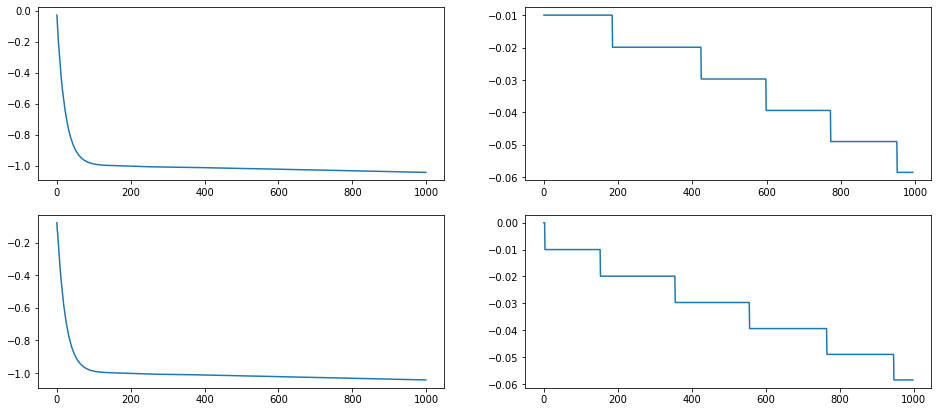

In [48]:
plt.figure(0, figsize=(16,7))

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(6,5)])))
plt.subplot(221)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(6,5)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-9-x-x-4'][(0,1)])))
plt.subplot(222)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-9-x-x-4'][(0,1)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(1,9)])))
plt.subplot(223)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(1,9)]))
plt.show

x_axis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-6-1'][(0,3)])))
plt.subplot(224)
plt.plot(x_axis,np.asarray(States_track['x-x-x-x-x-x-x-6-1'][(0,3)]))
plt.show


### Epsilon - decay check

In [49]:
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

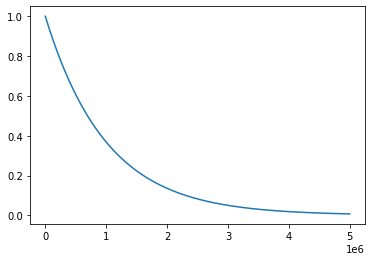

In [50]:
plt.plot(time, epsilon)
plt.show()